### Mike's Exploration of the ADH data...

This builds off of Spencer's replication. It cuts the data in a way that we can plot and understand what is going on...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from linearmodels.iv import IV2SLS

This reads in the ADH dataset and then adds a constant.

In [2]:
df = pd.read_stata("workfile_china.dta")
df["const"] = 1

Then lets check out the var names.

In [3]:
var_names  = pd.DataFrame(df.columns)

var_names.to_excel("var_names.xlsx") # If you want to see what they are (like 200) this 
                                     # this is one way to do it...

regions = list(filter(lambda x: x.startswith("reg"), df.columns))
                                    # Spencer's way to figure out regional dummies.

df["dm_IPW"] = df.d_tradeusch_pw / df.d_tradeusch_pw.mean()
                                    # This is a normalization I'm going to explore

This last bit takes the IPW measure and then divides by the mean. The idea here is to get things out of dollars and into a unit that we can better understand. 

In [4]:
df.set_index("yr").loc[1990].l_popcount.sum()

246449520.30095968

This then check the population, it says in 1990 there were 246 million and this check with what google is doing. Then below is jsut reports some summary statistics behind the average growth in wages. On average, it grew by 8 log points 

In [5]:
df.d_avg_lnwkwage.describe()

count    1444.000000
mean        8.117156
std         6.652195
min       -10.630540
25%         3.364171
50%         8.171014
75%        13.297486
max        37.523315
Name: d_avg_lnwkwage, dtype: float64

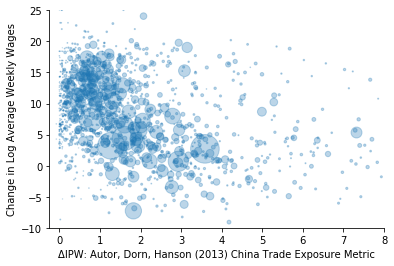

In [41]:
fig_path = "C:\\Users\\mwaugh.NYC-STERN\\Documents\\GitHub\\tradeexposure\\figures"

fig, ax = plt.subplots()

ax.scatter(df.d_tradeusch_pw, df.d_avg_lnwkwage,     # x,y variables 
            s = 0.00005*df.l_popcount,
            alpha = 0.30) # Then this last command specifies how dark or light the bubbles are...

#ax.set_title("Trade Exposure and Wage Growth")
ax.set_ylabel("Change in Log Average Weekly Wages") 
ax.set_xlabel("ΔIPW: Autor, Dorn, Hanson (2013) China Trade Exposure Metric")

ax.set_xlim(-.25,8)
ax.set_ylim(-10,25)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig(fig_path + "\\adh_data_wage_change.pdf", bbox_inches="tight", dpi = 1200)

plt.show()

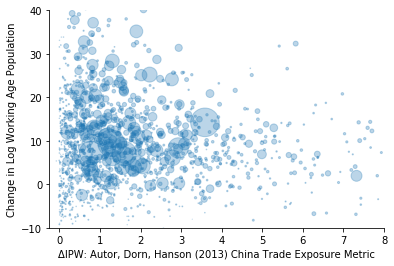

In [42]:
fig, ax = plt.subplots()

ax.scatter(df.d_tradeusch_pw, df.lnchg_popworkage,     # x,y variables 
            s = 0.00005*df.l_popcount,
            alpha = 0.30) # Then this last command specifies how dark or light the bubbles are...

#ax.set_title("Trade Exposure and Wage Growth")
ax.set_ylabel("Change in Log Working Age Population") 
ax.set_xlabel("ΔIPW: Autor, Dorn, Hanson (2013) China Trade Exposure Metric")

ax.set_xlim(-.25,8)
ax.set_ylim(-10,40)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig(fig_path + "\\adh_data_pop_change.pdf", bbox_inches="tight", dpi = 1200)

plt.show()

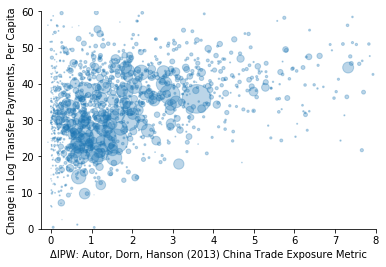

In [43]:
fig, ax = plt.subplots()

ax.scatter(df.d_tradeusch_pw, df.lnchg_trans_totindiv_pc,     # x,y variables 
            s = 0.00005*df.l_popcount,
            alpha = 0.30) # Then this last command specifies how dark or light the bubbles are...

#ax.set_title("Trade Exposure and Wage Growth")
ax.set_ylabel("Change in Log Transfer Payments, Per Capita") 
ax.set_xlabel("ΔIPW: Autor, Dorn, Hanson (2013) China Trade Exposure Metric")

ax.set_xlim(-.25,8)
ax.set_ylim(-0,60)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig(fig_path + "\\adh_data_trans_change.pdf", bbox_inches="tight", dpi = 1200)

plt.show()

**This is the Houshold income measure**

In [ ]:
fig_path = "C:\\Users\\mwaugh.NYC-STERN\\Documents\\GitHub\\tradeexposure\\figures"

fig, ax = plt.subplots()

ax.scatter(df.d_tradeusch_pw, relchg_avg_hhincsum_pc_pw,     # x,y variables 
            s = 0.00005*df.l_popcount,
            alpha = 0.30) # Then this last command specifies how dark or light the bubbles are...

#ax.set_title("Trade Exposure and Wage Growth")
ax.set_ylabel("Log Change in Average Weekly Wages") 
ax.set_xlabel("IPW: Autor, Dorn, Hanson (2013) China Trade Exposure Metric")

ax.set_xlim(-.25,8)
ax.set_ylim(-20,35)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

#plt.savefig(fig_path + "\\adh_data.pdf", bbox_inches="tight", dpi = 1200)

plt.show()

In [27]:
rhs_var = ["l_shind_manuf_cbp",
    "l_sh_popedu_c",
    "l_sh_popfborn",
    "l_sh_empl_f",
    "l_sh_routine33",
    "l_task_outsource", "t2"]


res_first = IV2SLS(df.lnchg_popworkage, df[["const"] + rhs_var+ regions+ ["d_tradeusch_pw"]], 
                   None, None, 
                   weights = df["timepwt48"]).fit(cov_type='unadjusted')

print(res_first)

                            OLS Estimation Summary                            
Dep. Variable:       lnchg_popworkage   R-squared:                      0.4250
Estimator:                        OLS   Adj. R-squared:                 0.4185
No. Observations:                1444   F-statistic:                    1067.3
Date:                Sat, Mar 10 2018   P-value (F-stat)                0.0000
Time:                        08:48:21   Distribution:                 chi2(16)
Cov. Estimator:            unadjusted                                         
                                                                              
                                 Parameter Estimates                                 
                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------
const                 1.1659     5.4564     0.2137     0.8308     -9.5284      11.860
l_shind_manuf_cbp    -0.

In [28]:
res_first = IV2SLS(df.lnchg_popworkage, df[["const"]+ rhs_var + regions], 
                   df.d_tradeusch_pw, df.d_tradeotch_pw_lag, 
                   weights = df["timepwt48"]).fit(cov_type='unadjusted')

print(res_first)

                          IV-2SLS Estimation Summary                          
Dep. Variable:       lnchg_popworkage   R-squared:                      0.4234
Estimator:                    IV-2SLS   Adj. R-squared:                 0.4169
No. Observations:                1444   F-statistic:                    1061.5
Date:                Sat, Mar 10 2018   P-value (F-stat)                0.0000
Time:                        08:48:41   Distribution:                 chi2(16)
Cov. Estimator:            unadjusted                                         
                                                                              
                                 Parameter Estimates                                 
                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------
const                 1.2356     5.4644     0.2261     0.8211     -9.4745      11.946
l_shind_manuf_cbp    -0.

In [16]:
just1990 = df.set_index("yr").loc[1990]

res_first = IV2SLS(just1990.d_avg_lnwkwage, 
                   just1990[["const"]], 
                   just1990.dm_IPW, just1990.d_tradeotch_pw_lag,
                   weights = just1990["timepwt48"]).fit(cov_type='unadjusted')

print(res_first)

                          IV-2SLS Estimation Summary                          
Dep. Variable:         d_avg_lnwkwage   R-squared:                      0.0008
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0006
No. Observations:                 722   F-statistic:                    0.0063
Date:                Thu, Mar 01 2018   P-value (F-stat)                0.9370
Time:                        16:17:57   Distribution:                  chi2(1)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          11.866     0.3043     38.987     0.0000      11.269      12.462
dm_IPW         0.0136     0.1717     0.0791     0.93